# STATISTICS

In [2]:

import os
import glob
import pandas as pd
import numpy as np
import math
#import pyentrp


#import antropy as ant
#import pyentrp

#from pyentrp import entropy as ent

import scipy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import math

import xml.etree.ElementTree as ET

import seaborn as sns
import seaborn.objects as so

curfolder = os.getcwd()
print(curfolder)


features = curfolder + '/feature_extraction_with2d.csv'
features = pd.read_csv(features)



e:\FLESH_IteratedLearning


# Normalize all the feature data

In [135]:
from sklearn.preprocessing import StandardScaler
normed_features = features.copy()
normed_features = normed_features.replace([np.inf, -np.inf], 0)
normed_features
normed_features[normed_features.columns[32:]] = StandardScaler().fit_transform(normed_features[normed_features.columns[32:]])

# SeaBorn Plots

In [3]:
import seaborn as sns
import seaborn.objects as so
sns.scatterplot(data=normed_features, x="generation_number", y="total_gesture_space2D", hue="gesture")

NameError: name 'normed_features' is not defined

# UMAP

In [137]:
import umap
reducer = umap.UMAP()

In [138]:
# THIS IS JUST TO ADDRESS THE KALT G0 ISSUE. IT MUST GO LATER ON
normed_features[normed_features.columns[32:]] = normed_features[normed_features.columns[32:]].fillna(0)

In [139]:
# create embeddings
embedding = reducer.fit_transform(normed_features[normed_features.columns[32:]])
embedding.shape
embeddings = pd.DataFrame(embedding)
features["X_embeddings"] = embeddings.iloc[:, 0]
features["Y_embeddings"] = embeddings.iloc[:, 1]
normed_features["X_embeddings"] = embeddings.iloc[:, 0]
normed_features["Y_embeddings"] = embeddings.iloc[:, 1]

/opt/anaconda3/envs/umap_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


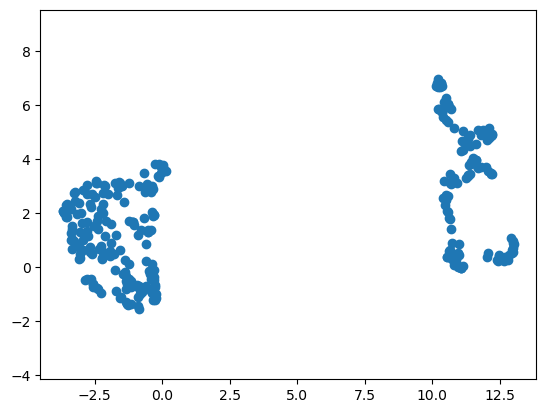

In [140]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
plt.gca().set_aspect('equal', 'datalim'))

Graph a specific gesture and its embeddings:

<Axes: xlabel='X_embeddings', ylabel='Y_embeddings'>

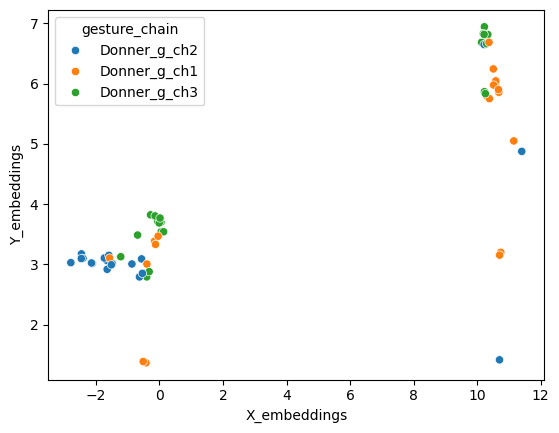

In [141]:
# graph a specific gesture and its differen't chains
specific = normed_features[normed_features['gesture'] == 'Donner']
sns.scatterplot(data=specific, x="X_embeddings", y="Y_embeddings", hue="gesture_chain")

graph all gestures and their embeddings:

<Axes: xlabel='X_embeddings', ylabel='Y_embeddings'>

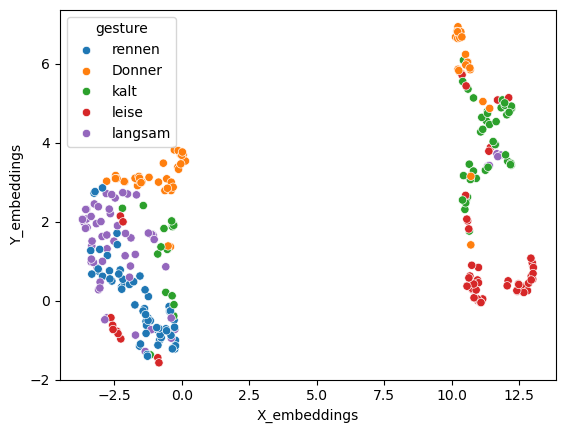

In [142]:
sns.scatterplot(data=normed_features, x="X_embeddings", y="Y_embeddings", hue="gesture")

# Set g0 for ch2 and 3


In [143]:
fix_row = normed_features[normed_features['fileID'] == "leise_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "leise_g_ch2_g0_compr.mp4"
fix_row["chainID"] = "ch2g0"
fix_row["chain_number"] = 2
fix_row["gesture_chain"] = 'leise_g_ch2'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)
#normed_features.loc[len(normed_features)]

fix_row = normed_features[normed_features['fileID'] == "leise_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "leise_g_ch3_g0_compr.mp4"
fix_row["chainID"] = "ch3g0"
fix_row["chain_number"] = 3
fix_row["gesture_chain"] = 'leise_g_ch3'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "langsam_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "langsam_g_ch2_g0_compr.mp4"
fix_row["chainID"] = "ch2g0"
fix_row["chain_number"] = 2
fix_row["gesture_chain"] = 'langsam_g_ch2'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "langsam_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "langsam_g_ch3_g0_compr.mp4"
fix_row["chainID"] = "ch3g0"
fix_row["chain_number"] = 3
fix_row["gesture_chain"] = 'langsam_g_ch3'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "rennen_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "rennen_g_ch2_g0_compr.mp4"
fix_row["chainID"] = "ch2g0"
fix_row["chain_number"] = 2
fix_row["gesture_chain"] = 'rennen_g_ch2'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "rennen_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "rennen_g_ch3_g0_compr.mp4"
fix_row["chainID"] = "ch3g0"
fix_row["chain_number"] = 3
fix_row["gesture_chain"] = 'rennen_g_ch3'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "Donner_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "Donner_g_ch2_g0_compr.mp4"
fix_row["chainID"] = "ch2g0"
fix_row["chain_number"] = 2
fix_row["gesture_chain"] = 'Donner_g_ch2'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "Donner_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "Donner_g_ch3_g0_compr.mp4"
fix_row["chainID"] = "ch3g0"
fix_row["chain_number"] = 2
fix_row["gesture_chain"] = 'Donner_g_ch3'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "kalt_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "kalt_g_ch2_g0_compr.mp4"
fix_row["chainID"] = "ch2g0"
fix_row["chain_number"] = 2
fix_row["gesture_chain"] = 'kalt_g_ch2'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "kalt_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "kalt_g_ch3_g0_compr.mp4"
fix_row["chainID"] = "ch3g0"
fix_row["chain_number"] = 2
fix_row["gesture_chain"] = 'kalt_g_ch3'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)



In [144]:
normed_features

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,right_knee_entropy2D,left_knee_entropy2D,right_ankle_entropy2D,left_ankle_entropy2D,total_body_entropy2D,right_wrist_variability2D,left_wrist_variability2D,total_body_variability2D,X_embeddings,Y_embeddings
0,2024-06-22 23:25:43,2024-06-22 23:27:12,IP Address,37.188.157.236,100.0,89.0,True,2024-06-22 23:27:12,R_2HMoqmnLDjTlvNN,NaN,...,0.897487,0.865501,0.676895,0.549502,0.774965,-0.269572,-0.047541,-0.196202,-0.592637,-0.713828
1,2024-06-22 19:10:30,2024-06-22 19:11:50,IP Address,80.187.86.205,100.0,79.0,True,2024-06-22 19:11:51,R_85octQBWW7eTgY1,NaN,...,0.836842,0.726559,0.722606,0.514650,0.600307,1.543213,1.062494,1.598722,-0.560146,3.089413
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.190243,-1.191379,-1.191595,-1.191335,-1.649929,-0.957540,-0.863379,-1.114795,10.481882,2.311863
3,2024-06-22 18:30:47,2024-06-22 18:32:31,IP Address,80.187.84.147,100.0,104.0,True,2024-06-22 18:32:32,R_2CBcu7cAm27UMef,NaN,...,0.947593,0.660366,1.020308,1.026474,0.921288,0.059306,-0.038456,0.013733,-0.422075,1.364668
4,2024-06-22 20:40:38,2024-06-22 20:41:50,IP Address,195.37.172.125,100.0,71.0,True,2024-06-22 20:41:50,R_2ITaokxupfNc5aE,NaN,...,0.634586,0.563262,0.749603,0.647490,0.506378,0.922410,0.311407,0.760846,-1.094933,1.682335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.928139,0.848104,1.038584,0.979449,1.087954,-0.737106,-0.670402,-0.861638,-1.238434,0.104123
309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.961436,0.792356,1.069855,0.796514,0.985362,-0.730855,-0.417719,-0.705718,-1.566592,3.103379
310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.961436,0.792356,1.069855,0.796514,0.985362,-0.730855,-0.417719,-0.705718,-1.566592,3.103379
311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.190243,-1.191379,-1.191595,-1.191335,-1.649929,-0.957540,-0.863379,-1.114795,10.481882,2.311863


# Save Normed Features Dataframe with Embeddings


In [145]:
globals()["normed_features"] = normed_features
globals()["normed_features"].to_csv(os.path.join(curfolder, f'{"normed_features"}.csv'), index=False)

# Euclidean Distances

Comparing Two Vectors

In [146]:
# make sure to put normalized vectors into this function. 
def calculate_distances(feature_vector1, feature_vector2):
    squared_diff =np.square(feature_vector1-feature_vector2)
    sum_squared_diff = np.sum(squared_diff)
    eucl_distance = math.sqrt(sum_squared_diff)
    return eucl_distance

# feed in the dataframe that contains just the vector of features.
def calculate_distances_to_all(target_segment_index, array):
    target_segment = array[target_segment_index]
    distances = np.empty(array.shape[0])
    i = 0
    for row in array:
        distances[i] = calculate_distances(target_segment, row)
        i = i+1
    return distances


Comparing all vectors to each other and saving in a dataframe

In [147]:
interseg_dist = np.empty(normed_features[normed_features.columns[32:60]].shape)
interseg_dist = pd.DataFrame(interseg_dist)
interseg_dist = pd.DataFrame()
#make individual id for each segment
df_of_vectors = normed_features[normed_features.columns[32:60]].copy()
df_of_vectors = df_of_vectors.to_numpy()


# calculate distance between each segment
for i in range (normed_features[normed_features.columns[32:60]].shape[0]):
    id = normed_features.loc[i, 'fileID']
    interseg_dist_vector = calculate_distances_to_all(i, df_of_vectors)
    #interseg_dist_vector = interseg_dist_vector.reshape(1, -1)
    interseg_dist = interseg_dist.rename(index={i: id})
    interseg_dist = interseg_dist.rename(columns={i: id})
    interseg_dist[id] = interseg_dist_vector
    index = interseg_dist.index

# IS THIS FINE? 
interseg_dist.to_csv('interseg_dist.csv', index=True)





# Open the Distance Folder and Do Statistics

In [3]:
interseg_dist = pd.read_csv(os.path.join(curfolder, 'interseg_dist.csv')).set_index('Unnamed: 0')
normed_features = pd.read_csv(os.path.join(curfolder, 'normed_features.csv'))

## How does the efficiency measure of gesture space change over the a chain?

Donner:

<Axes: xlabel='generation_number', ylabel='total_gesture_space2D'>

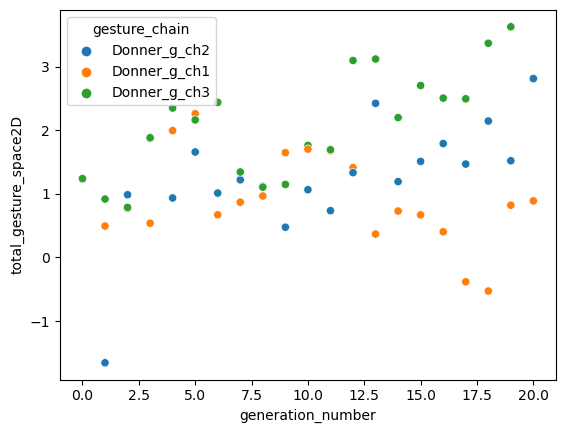

In [4]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'Donner'], x="generation_number", y="total_gesture_space2D", hue = 'gesture_chain')


<Axes: xlabel='generation_number', ylabel='total_gesture_space2D'>

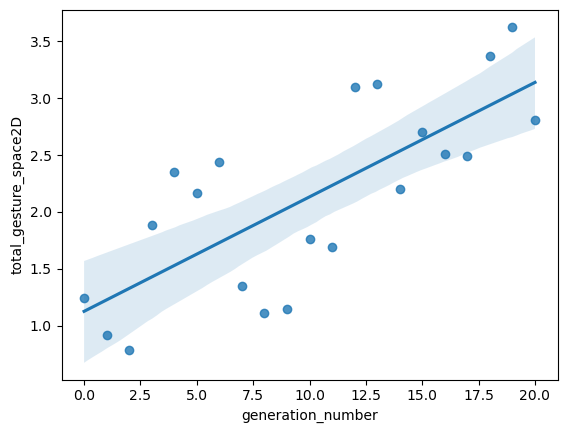

In [5]:
sns.regplot(data=normed_features[normed_features["gesture_chain"] == 'Donner_g_ch3'], x="generation_number", y="total_gesture_space2D", order =1)

Leise:

<Axes: xlabel='generation_number', ylabel='total_gesture_space2D'>

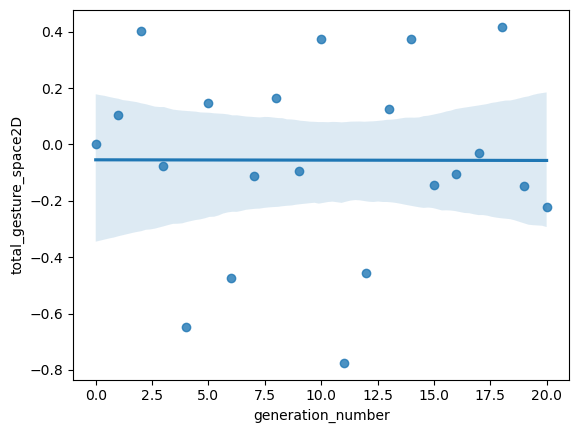

In [6]:
sns.regplot(data=normed_features[normed_features["gesture_chain"] == 'kalt_g_ch3'], x="generation_number", y="total_gesture_space2D", order =1)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

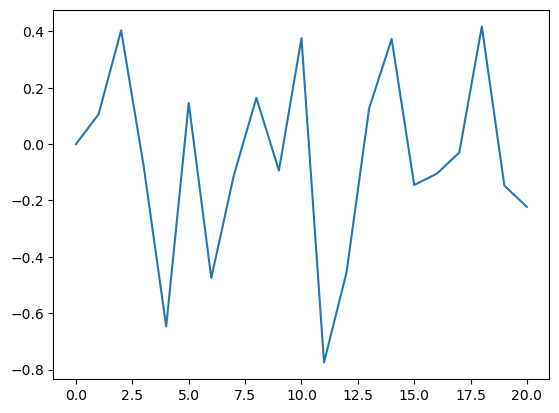

In [7]:
sns.lineplot(data=normed_features[normed_features["gesture_chain"] == 'kalt_g_ch3'], x="generation_number", y="total_gesture_space2D", hue = 'gesture_chain')


<Axes: xlabel='generation_number', ylabel='total_gesture_space2D'>

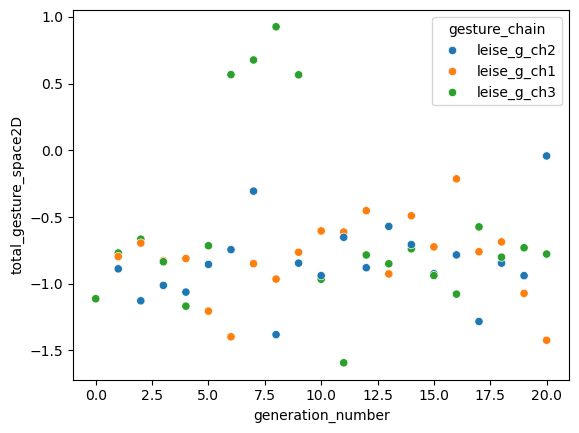

In [150]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'leise'], x="generation_number", y="total_gesture_space2D", hue = 'gesture_chain')

kalt

<Axes: xlabel='generation_number', ylabel='total_gesture_space2D'>

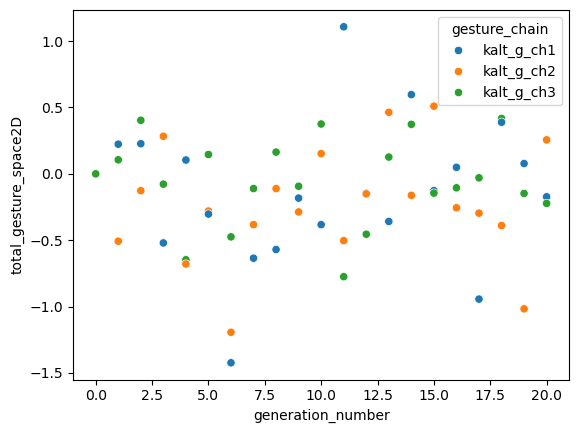

In [151]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'kalt'], x="generation_number", y="total_gesture_space2D", hue = 'gesture_chain')

langsam:

<Axes: xlabel='generation_number', ylabel='total_gesture_space2D'>

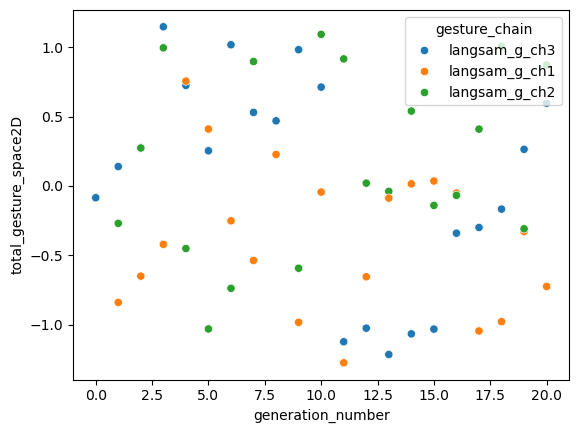

In [152]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'langsam'], x="generation_number", y="total_gesture_space2D", hue = 'gesture_chain')

rennen:

<Axes: xlabel='generation_number', ylabel='total_gesture_space2D'>

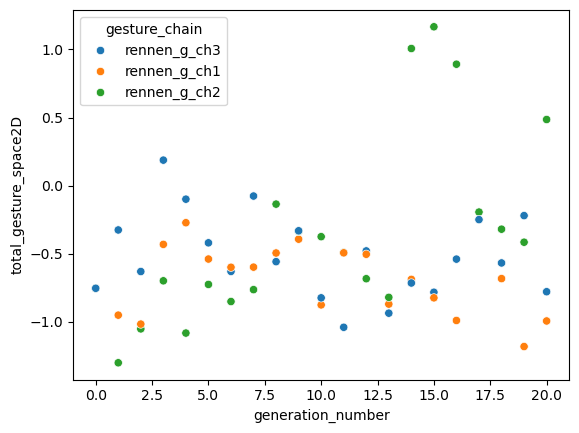

In [153]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'rennen'], x="generation_number", y="total_gesture_space2D", hue = 'gesture_chain')

# Does a bigger difference in age lead to a bigger difference in gesture? Does a bigger difference in extroversion lead to a bigger difference in gesture?

In [4]:
interseg_dist = pd.read_csv(os.path.join(curfolder, 'interseg_dist.csv')).set_index('Unnamed: 0')
normed_features = pd.read_csv(os.path.join(curfolder, 'normed_features.csv'))

#interseg_dist = interseg_dist.rename(index={0: 'rennen_g_ch3_g12_compr.mp4'})
print(interseg_dist.head)

<bound method NDFrame.head of                             rennen_g_ch3_g12_compr.mp4  \
Unnamed: 0                                               
0                                             0.000000   
Donner_g_ch2_g3_compr.mp4                     7.442081   
kalt_g_ch1_g0_compr.mp4                       6.802753   
Donner_g_ch1_g16_compr.mp4                    3.148292   
kalt_g_ch2_g10_compr.mp4                      3.015454   
...                                                ...   
rennen_g_ch3_g0_compr.mp4                     3.798092   
Donner_g_ch2_g0_compr.mp4                     6.067486   
Donner_g_ch3_g0_compr.mp4                     6.067486   
kalt_g_ch2_g0_compr.mp4                       6.802753   
kalt_g_ch3_g0_compr.mp4                       6.802753   

                            Donner_g_ch2_g3_compr.mp4  \
Unnamed: 0                                              
0                                            7.442081   
Donner_g_ch2_g3_compr.mp4                   

In [36]:
# creates two arrays to track the x and y values (diff in age vs distance between gestures)
big_df = pd.DataFrame(index=range(60), columns=['participantID', 'generation_number', 'chain_number', 'chainID', 'age', 'extrovert', 'diff_in_age', 'diff_in_extrovert', 
                               'diff_in_gesture_space_Donner', 'diff_in_entropy_Donner', 'diff_in_variability_Donner',
                               'diff_in_gesture_space_kalt', 'diff_in_entropy_kalt', 'diff_in_variability_kalt',
                                 'diff_in_gesture_space_langsam', 'diff_in_entropy_langsam','diff_in_variability_langsam',
                                   'diff_in_gesture_space_leise', 'diff_in_entropy_leise', 'diff_in_variability_leise',
                                     'diff_in_gesture_space_rennen','diff_in_entropy_rennen', 'diff_in_variability_rennen',
                                       'diff_in_gesture_space_mean', 'diff_in_entropy_mean', 'diff_in_variability_mean', 
                                       'total_dist_Donner', 'total_dist_kalt' , 'total_dist_langsam', 'total_dist_leise', 'total_dist_rennen', 'total_dist_mean'])
big_df['participantID'] = big_df.index

# rename row zero which got messed up in the interseg_dist matrix
interseg_dist = interseg_dist.rename(index={str(0): 'rennen_g_ch3_g12_compr.mp4'})
for i in range(interseg_dist.shape[0]-1):

    # get the current gesture
    curr_gesture = interseg_dist.index[i]

    # get the row of features of the current gesture and aspects of the gesture
    curr_features_row = normed_features[normed_features['fileID'] == curr_gesture]
    gesture = curr_features_row["gesture"].iloc[0]
    generation_number = curr_features_row["generation_number"].iloc[0]
    generation_number = generation_number.astype(int)

    # if the current gesture is seed zero, go to the next iteration
    if generation_number == 0:
        continue
    chain_number = curr_features_row["chain_number"].iloc[0]
    chain_number =chain_number.astype(int)
    chainID = curr_features_row["chainID"].iloc[0]
    participantID_curr = curr_features_row["participantID"].iloc[0]

    # get the previous gesture
    previous_gesture = gesture + "_g_ch" + str(chain_number) + "_g" + str((generation_number)-1) + "_compr.mp4"

    # if either of the gestures are the ones we don't have video for, skip this iteration
    if curr_gesture == "rennen_g_ch1_g17_compr.mp4" or curr_gesture == "langsam_g_ch2_g8_compr.mp4" or previous_gesture== "rennen_g_ch1_g17_compr.mp4" or previous_gesture == "langsam_g_ch2_g8_compr.mp4":
        continue

    prev_features_row = normed_features[normed_features['fileID'] == previous_gesture]

    ## adding information about the current gesture:
    big_df.loc[participantID_curr, 'generation_number'] = generation_number
    big_df.loc[participantID_curr, 'chain_number'] = chain_number
    big_df.loc[participantID_curr, 'chainID'] = chainID


    #### COMPARING DISTANCES ######
    # get the overall distances between the two gestures and add it to the correct cell 
    distance = interseg_dist.loc[previous_gesture, curr_gesture]
    big_df.loc[participantID_curr, 'total_dist_' + gesture] =distance
    # get the difference between gesture spaces
    gesture_space_diff = abs(curr_features_row["total_gesture_space2D"].iloc[0] - prev_features_row["total_gesture_space2D"].iloc[0])
    big_df.loc[participantID_curr, 'diff_in_gesture_space_' + gesture] =gesture_space_diff
     # get the difference between entrophies
    entropy_diff = abs(curr_features_row["total_body_entropy2D"].iloc[0] - prev_features_row["total_body_entropy2D"].iloc[0])
    big_df.loc[participantID_curr, 'diff_in_entropy_' + gesture] = entropy_diff
    # # get the difference between variabilities
    variability_diff = abs(curr_features_row["total_body_variability2D"].iloc[0] - prev_features_row["total_body_variability2D"].iloc[0])
    big_df.loc[participantID_curr, 'diff_in_variability_' + gesture] = variability_diff    

    ### COMPARING DEMOGRAPHICS ######
    #ignore the ones that we don't have participant data for
    if participantID_curr == 17 or participantID_curr == 40 or participantID_curr == 20 or participantID_curr == 21 or participantID_curr == 22 or participantID_curr == 26:
        continue

    # if age hasn't been filled in yet:
    if (big_df[big_df['participantID'] == participantID_curr]['diff_in_age']).isna:
        #get the distance between the ages
        previous_age = prev_features_row["Q2"].iloc[0]
        curr_age = curr_features_row["Q2"].iloc[0]
        # if we don't know the ages, skip this iteration
        if math.isnan(previous_age) or math.isnan(curr_age):
            continue
    #get the difference in ages
        diff_in_age = int(abs(curr_age - previous_age))
        big_df.loc[participantID_curr, 'diff_in_age'] = diff_in_age
        big_df.loc[participantID_curr, 'age'] = curr_age

    #get the difference in extroversion
    if (big_df[big_df['participantID'] == participantID_curr]['diff_in_extrovert']).isna:
        previous_extrovert = prev_features_row["Q7_16"].iloc[0]
        curr_extrovert = curr_features_row["Q7_16"].iloc[0]
        # if we don't know the extroversion, skip this iteration
        if math.isnan(previous_extrovert) or math.isnan(curr_extrovert):
            continue
        #get the difference in extroversion
        diff_in_extrovert = int(abs(curr_extrovert - previous_extrovert))
        big_df.loc[participantID_curr, 'diff_in_extrovert'] = diff_in_extrovert
        big_df.loc[participantID_curr, 'extrovert'] = curr_extrovert

    ### store demographic information in this big dataframe so that I can see whether youger people change their gestures more than older people


# FINDING THE MEANS
big_df['diff_in_gesture_space_mean'] = big_df[['diff_in_gesture_space_Donner', 'diff_in_gesture_space_kalt', 'diff_in_gesture_space_langsam', 'diff_in_gesture_space_leise', 'diff_in_gesture_space_rennen']].mean(axis=1)
big_df['diff_in_entropy_mean'] = big_df[['diff_in_entropy_Donner', 'diff_in_entropy_kalt', 'diff_in_entropy_langsam', 'diff_in_entropy_leise', 'diff_in_entropy_rennen']].mean(axis=1)
big_df['diff_in_variability_mean'] = big_df[['diff_in_variability_Donner', 'diff_in_variability_kalt', 'diff_in_variability_langsam', 'diff_in_variability_leise', 'diff_in_variability_rennen']].mean(axis=1)
big_df['total_dist_mean'] = big_df[['total_dist_Donner', 'total_dist_kalt', 'total_dist_langsam', 'total_dist_leise', 'total_dist_rennen']].mean(axis=1)



In [37]:
big_df

,participantID,generation_number,chain_number,chainID,age,extrovert,diff_in_age,diff_in_extrovert,diff_in_gesture_space_Donner,diff_in_entropy_Donner,...,diff_in_variability_rennen,diff_in_gesture_space_mean,diff_in_entropy_mean,diff_in_variability_mean,total_dist_Donner,total_dist_kalt,total_dist_langsam,total_dist_leise,total_dist_rennen,total_dist_mean
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1,1,ch1g1,NaN,NaN,NaN,NaN,0.745747,1.854879,...,0.035368,0.447546,0.535838,0.234806,6.413534,3.648075,3.208305,1.888965,3.507582,3.733292
2,2.0,2,1,ch1g2,24.0,17.0,2,23,0.276071,0.047018,...,0.117968,0.127119,0.049715,0.722775,1.981644,3.741619,0.858915,0.496771,0.632389,1.542268
3,3.0,3,1,ch1g3,32.0,60.0,8,43,0.231353,1.912328,...,0.186029,0.384731,0.463609,0.635583,5.242315,2.767771,0.998242,1.915373,1.847896,2.554319
4,4.0,4,1,ch1g4,60.0,86.0,28,26,1.456622,0.064835,...,0.013667,0.686673,0.716308,0.280934,4.408148,5.000172,3.875986,7.565828,1.043205,4.378668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56.0,16,3,ch3g16,21.0,80.0,1,50,0.198278,0.056234,...,0.567306,0.262515,1.156294,1.623579,1.408543,5.550059,7.323649,7.585299,2.075488,4.788608
57,57.0,17,3,ch3g17,50.0,30.0,29,50,0.011038,0.057542,...,0.050327,0.184172,0.432406,0.971846,1.343485,2.927891,0.999679,7.911574,1.900295,3.016585
58,58.0,18,3,ch3g18,28.0,60.0,22,30,0.874247,1.607637,...,0.037204,0.399795,0.367858,0.930399,6.051228,1.493438,4.388088,2.494902,2.721405,3.429812
59,59.0,19,3,ch3g19,27.0,40.0,1,20,0.258686,1.701568,...,0.014908,0.334598,1.029893,1.38747,5.258844,5.833817,4.34658,4.821071,3.04346,4.660754


Graph diff in age vs gesture distance

# THIS GRAPH ANSWERS THE QUESTION: DOES AGE AFFECT HOW MUCH YOU CHANGE THE GESTURE?

<Axes: xlabel='age', ylabel='diff_in_gesture_space_mean'>

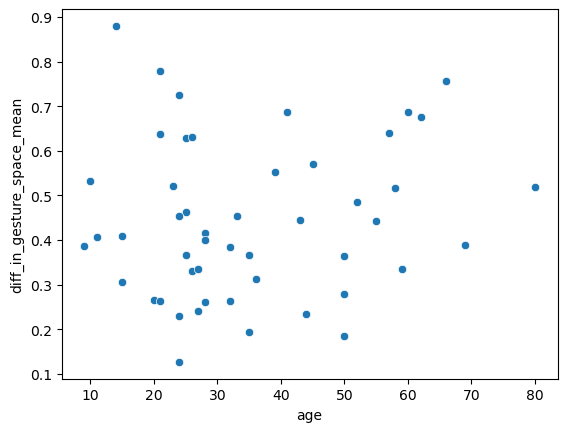

In [41]:
sns.scatterplot(data=big_df, x="age", y="diff_in_gesture_space_mean")

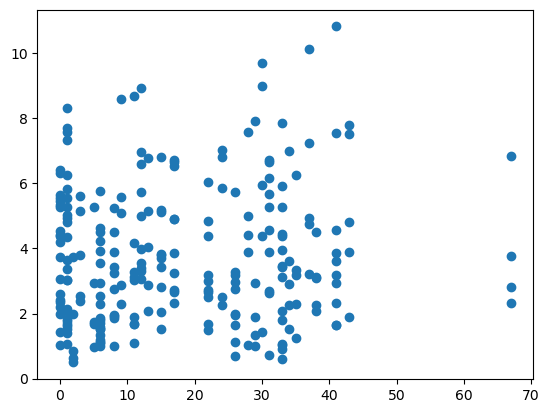

In [155]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(diff_in_age_array, diff_in_dist_array, 'o')
plt.show()

Graph diff in extroversion vs gesture distance

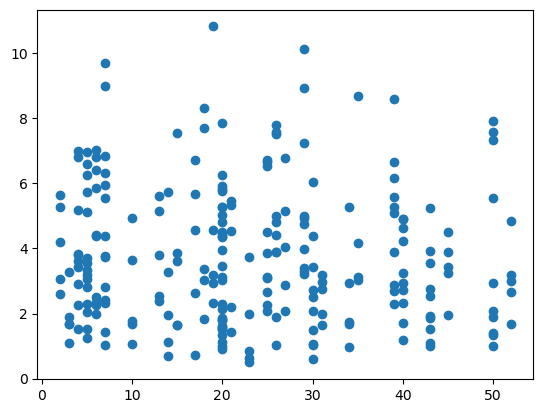

In [156]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(diff_in_extrovert_array, diff_in_dist_array, 'o')
plt.show()

# Does age correlate with gesture size? (Should I separate this graph by gesture type?)

<Axes: xlabel='Q2', ylabel='total_gesture_space2D'>

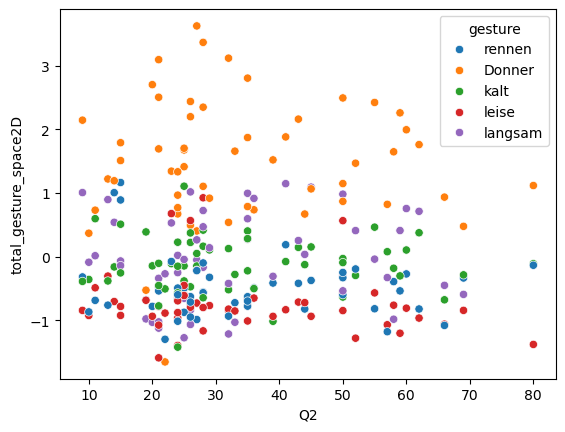

In [157]:
sns.scatterplot(data=normed_features, x="Q2", y="total_gesture_space2D", hue = 'gesture')

# Does extroversion correlate with gesture size?

rennen:

<Axes: xlabel='Q7_16', ylabel='total_gesture_space2D'>

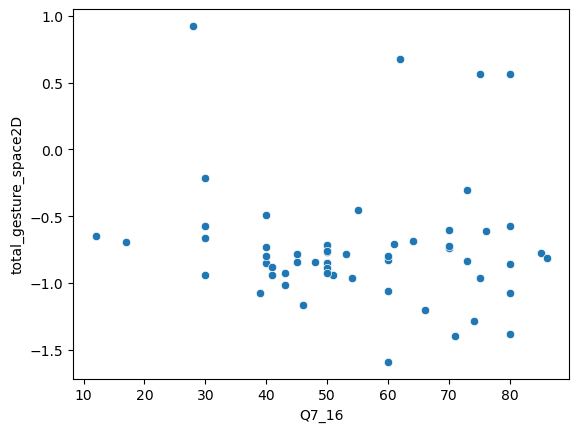

In [4]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'leise'], x="Q7_16", y="total_gesture_space2D")

leise:

<Axes: xlabel='Q7_16', ylabel='total_gesture_space2D'>

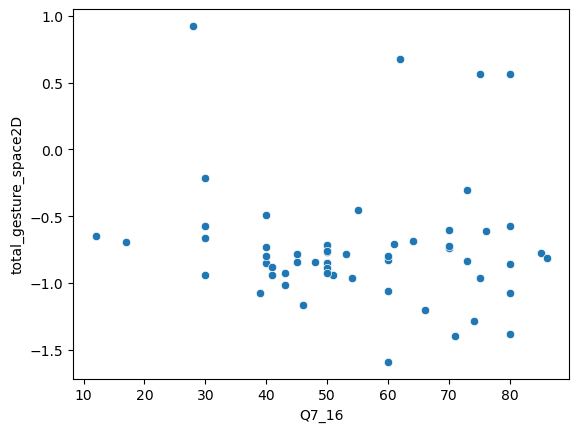

In [159]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'leise'], x="Q7_16", y="total_gesture_space2D")

langsam:

<Axes: xlabel='Q7_16', ylabel='total_gesture_space2D'>

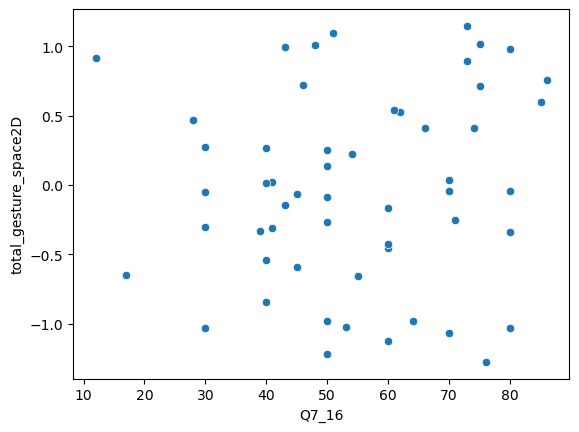

In [160]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'langsam'], x="Q7_16", y="total_gesture_space2D")

Donner:

<Axes: xlabel='Q7_16', ylabel='total_gesture_space2D'>

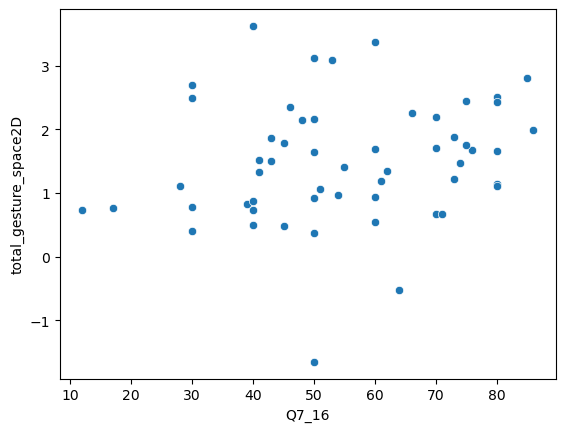

In [161]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'Donner'], x="Q7_16", y="total_gesture_space2D")

Kalt:

<Axes: xlabel='Q7_16', ylabel='total_gesture_space2D'>

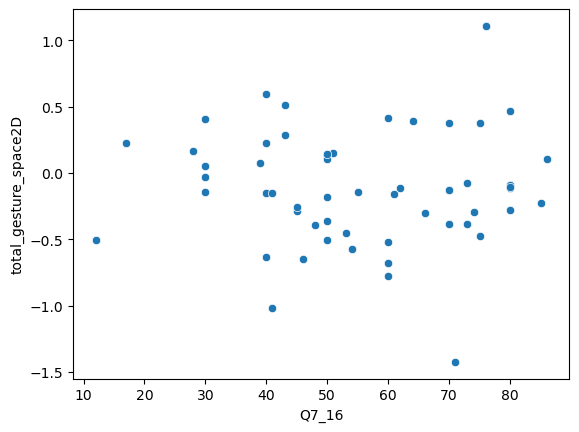

In [162]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'kalt'], x="Q7_16", y="total_gesture_space2D")